In [2]:
import tensorflow as tf



import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

import json
import math
import os
import cv2
from PIL import Image
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet201
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools

# Data extraction

In [3]:
list_magnification=['40X','100X','200X','400X']

In [4]:
import os
os.chdir('/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast')

!ls

def Dataset_loader(DIR, RESIZE, sigmaX=200):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG

path=os.walk('/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB')

benign=[]
for root,directories, files in path:
    
    for directory in directories:
        if directory in list_magnification:
            benign.append(np.array(Dataset_loader(root+'/'+directory,224)))
            print(root+'/'+directory)

benign_final=np.array(list(itertools.chain.from_iterable(benign)))

benign_final.shape

path=os.walk('/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB')

malignant=[]
for root,directories, files in path:
    
    for directory in directories:
        if directory in list_magnification:
            malignant.append(np.array(Dataset_loader(root+'/'+directory,224)))
            print(root+'/'+directory)

DCGAN_generated_output count_files.sh         malignant
README.txt             initial_weights.h5
benign                 logs


 23%|██▎       | 7/30 [00:00<00:00, 66.93it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X


 24%|██▍       | 7/29 [00:00<00:00, 62.26it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/400X


 22%|██▏       | 7/32 [00:00<00:00, 61.19it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/40X


 18%|█▊        | 6/34 [00:00<00:00, 55.79it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/200X


 21%|██        | 6/29 [00:00<00:00, 59.97it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549G/100X


 20%|██        | 7/35 [00:00<00:00, 62.61it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549G/400X


 19%|█▉        | 6/32 [00:00<00:00, 59.26it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549G/40X


 22%|██▏       | 8/36 [00:00<00:00, 71.03it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549G/200X


 23%|██▎       | 7/30 [00:00<00:00, 62.80it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549CD/100X


 20%|██        | 7/35 [00:00<00:00, 65.91it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549CD/400X


 23%|██▎       | 7/31 [00:00<00:00, 69.22it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549CD/40X


  0%|          | 0/17 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549CD/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/100X


 47%|████▋     | 7/15 [00:00<00:00, 62.76it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/400X


 50%|█████     | 8/16 [00:00<00:00, 71.65it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/40X


 19%|█▉        | 7/37 [00:00<00:00, 63.46it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/200X


 24%|██▍       | 7/29 [00:00<00:00, 62.64it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-16184CD/100X


 20%|██        | 7/35 [00:00<00:00, 68.70it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-16184CD/400X


 26%|██▌       | 6/23 [00:00<00:00, 56.36it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-16184CD/40X


 18%|█▊        | 6/34 [00:00<00:00, 59.14it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-16184CD/200X


 29%|██▉       | 7/24 [00:00<00:00, 69.40it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-16184/100X


 15%|█▌        | 6/39 [00:00<00:00, 54.70it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-16184/400X


 17%|█▋        | 6/35 [00:00<00:00, 53.64it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-16184/40X


 50%|█████     | 7/14 [00:00<00:00, 67.15it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-16184/200X


  0%|          | 0/15 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-13200/100X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-13200/400X


 33%|███▎      | 7/21 [00:00<00:00, 66.66it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-13200/40X


  0%|          | 0/15 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-13200/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-15275/100X


  0%|          | 0/12 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-15275/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-15275/40X


100%|██████████| 18/18 [00:00<00:00, 92.02it/s]


/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-15275/200X


  0%|          | 0/16 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/100X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/400X


100%|██████████| 17/17 [00:00<00:00, 86.65it/s]


/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/40X


  0%|          | 0/17 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-3411F/100X


  0%|          | 0/16 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-3411F/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-3411F/40X


  0%|          | 0/16 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-3411F/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X


  0%|          | 0/16 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/40X


  0%|          | 0/17 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-29960AB/100X


  0%|          | 0/18 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-29960AB/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-29960AB/40X


  0%|          | 0/18 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-29960AB/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23222AB/100X


  0%|          | 0/17 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23222AB/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23222AB/40X


 19%|█▉        | 6/31 [00:00<00:00, 57.72it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23222AB/200X


 19%|█▉        | 7/37 [00:00<00:00, 65.63it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/100X


 19%|█▉        | 7/36 [00:00<00:00, 63.27it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/400X


 18%|█▊        | 7/38 [00:00<00:00, 63.35it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/40X


 19%|█▉        | 7/36 [00:00<00:00, 63.67it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/200X


 31%|███       | 8/26 [00:00<00:00, 77.20it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/100X


 27%|██▋       | 7/26 [00:00<00:00, 62.74it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X


 18%|█▊        | 7/38 [00:00<00:00, 69.03it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/40X


  0%|          | 0/16 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060CD/100X


  0%|          | 0/16 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060CD/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060CD/40X


 23%|██▎       | 7/31 [00:00<00:00, 64.61it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060CD/200X


 25%|██▌       | 8/32 [00:00<00:00, 72.61it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998CD/100X


 19%|█▉        | 7/37 [00:00<00:00, 67.09it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998CD/400X


 22%|██▏       | 8/37 [00:00<00:00, 76.56it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998CD/40X


 21%|██        | 7/33 [00:00<00:00, 68.64it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998CD/200X


 21%|██        | 7/33 [00:00<00:00, 69.56it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-25197/100X


 32%|███▏      | 7/22 [00:00<00:00, 60.33it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-25197/400X


 19%|█▉        | 6/32 [00:00<00:00, 57.89it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-25197/40X


 21%|██        | 7/33 [00:00<00:00, 63.97it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-25197/200X


 25%|██▌       | 7/28 [00:00<00:00, 64.86it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998EF/100X


 26%|██▌       | 8/31 [00:00<00:00, 70.67it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998EF/400X


 24%|██▍       | 7/29 [00:00<00:00, 68.33it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998EF/40X


 22%|██▏       | 7/32 [00:00<00:00, 65.07it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-21998EF/200X


 50%|█████     | 6/12 [00:00<00:00, 56.89it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134E/100X


 24%|██▍       | 7/29 [00:00<00:00, 61.13it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134E/400X


 29%|██▊       | 6/21 [00:00<00:00, 59.47it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134E/40X


 45%|████▌     | 10/22 [00:00<00:00, 97.78it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134E/200X


  0%|          | 0/23 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060AB/100X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060AB/400X


  0%|          | 0/39 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060AB/40X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060AB/200X


 21%|██        | 8/39 [00:00<00:00, 70.44it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-22704/100X


 18%|█▊        | 7/38 [00:00<00:00, 64.89it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-22704/400X


 17%|█▋        | 7/42 [00:00<00:00, 65.99it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-22704/40X


 11%|█         | 7/66 [00:00<00:00, 66.03it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-22704/200X


 12%|█▏        | 7/59 [00:00<00:00, 67.67it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-21998AB/100X


 12%|█▏        | 7/58 [00:00<00:00, 67.85it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-21998AB/400X


 13%|█▎        | 7/52 [00:00<00:00, 62.55it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-21998AB/40X


 44%|████▍     | 7/16 [00:00<00:00, 67.43it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-21998AB/200X


 53%|█████▎    | 9/17 [00:00<00:00, 87.32it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-29315EF/100X


  0%|          | 0/14 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-29315EF/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-29315EF/40X


100%|██████████| 14/14 [00:00<00:00, 79.01it/s]


/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-29315EF/200X


  0%|          | 0/15 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13418DE/100X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13418DE/400X


  0%|          | 0/50 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13418DE/40X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13418DE/200X


 23%|██▎       | 8/35 [00:00<00:00, 72.43it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-16456/100X


 15%|█▌        | 7/46 [00:00<00:00, 62.06it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-16456/400X


 17%|█▋        | 8/47 [00:00<00:00, 72.24it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-16456/40X


 32%|███▏      | 8/25 [00:00<00:00, 73.31it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-16456/200X


 39%|███▉      | 7/18 [00:00<00:00, 64.03it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-12773/100X


 27%|██▋       | 7/26 [00:00<00:00, 67.12it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-12773/400X


 33%|███▎      | 7/21 [00:00<00:00, 68.82it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-12773/40X


  0%|          | 0/15 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-12773/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979C/100X


  0%|          | 0/16 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979C/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979C/40X


 32%|███▏      | 7/22 [00:00<00:00, 66.99it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979C/200X


  0%|          | 0/15 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842/100X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842/400X


 50%|█████     | 8/16 [00:00<00:00, 72.97it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842/40X


  0%|          | 0/16 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842D/100X


  0%|          | 0/16 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842D/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842D/40X


 17%|█▋        | 7/41 [00:00<00:00, 62.99it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842D/200X


 27%|██▋       | 7/26 [00:00<00:00, 69.42it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13413/100X


 24%|██▍       | 7/29 [00:00<00:00, 64.97it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13413/400X


 30%|███       | 7/23 [00:00<00:00, 67.70it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13413/40X


 26%|██▌       | 7/27 [00:00<00:00, 66.75it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13413/200X


 29%|██▉       | 7/24 [00:00<00:00, 66.71it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979/100X


 27%|██▋       | 7/26 [00:00<00:00, 63.82it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979/400X


 33%|███▎      | 7/21 [00:00<00:00, 66.11it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979/40X


  0%|          | 0/15 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-19979/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-10147/100X


  0%|          | 0/22 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-10147/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-10147/40X


  0%|          | 0/15 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-10147/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/100X


  0%|          | 0/15 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/40X


 28%|██▊       | 8/29 [00:00<00:00, 71.11it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/200X


 23%|██▎       | 8/35 [00:00<00:00, 73.29it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15704/100X


 23%|██▎       | 7/30 [00:00<00:00, 65.50it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15704/400X


 21%|██        | 7/33 [00:00<00:00, 59.45it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15704/40X


 21%|██        | 8/38 [00:00<00:00, 72.28it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15704/200X


 19%|█▉        | 7/36 [00:00<00:00, 69.79it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-19440/100X


 20%|██        | 7/35 [00:00<00:00, 61.53it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-19440/400X


 21%|██        | 7/33 [00:00<00:00, 69.49it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-19440/40X


 33%|███▎      | 7/21 [00:00<00:00, 66.73it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-19440/200X


  0%|          | 0/21 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-12465/100X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-12465/400X


 42%|████▏     | 8/19 [00:00<00:00, 72.03it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-12465/40X


  0%|          | 0/15 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-12465/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15687B/100X


  0%|          | 0/14 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15687B/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15687B/40X


 32%|███▏      | 7/22 [00:00<00:00, 67.87it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15687B/200X


 29%|██▉       | 7/24 [00:00<00:00, 63.35it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/100X


 26%|██▌       | 6/23 [00:00<00:00, 57.33it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/400X


 33%|███▎      | 7/21 [00:00<00:00, 67.02it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/40X


 28%|██▊       | 7/25 [00:00<00:00, 65.10it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-9146/200X


 35%|███▌      | 7/20 [00:00<00:00, 67.60it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11951/100X


 26%|██▌       | 7/27 [00:00<00:00, 65.62it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11951/400X


 25%|██▌       | 7/28 [00:00<00:00, 63.03it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11951/40X


  0%|          | 0/9 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11951/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-8168/100X


  0%|          | 0/9 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-8168/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-8168/40X


 17%|█▋        | 7/41 [00:00<00:00, 62.56it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-8168/200X


 16%|█▌        | 6/38 [00:00<00:00, 57.96it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/100X


 25%|██▌       | 8/32 [00:00<00:00, 70.59it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/400X


 20%|██        | 7/35 [00:00<00:00, 62.50it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X


  0%|          | 0/15 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15792/100X


 50%|█████     | 7/14 [00:00<00:00, 63.57it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15792/400X


  0%|          | 0/19 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15792/40X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15792/200X


 30%|███       | 7/23 [00:00<00:00, 66.91it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16188/100X


 29%|██▉       | 7/24 [00:00<00:00, 66.13it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16188/400X


 38%|███▊      | 8/21 [00:00<00:00, 70.37it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16188/40X


  0%|          | 0/14 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16188/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2985/100X


 35%|███▌      | 7/20 [00:00<00:00, 66.79it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2985/400X


  0%|          | 0/16 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2985/40X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2985/200X


 44%|████▍     | 7/16 [00:00<00:00, 68.92it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17915/100X


 31%|███       | 8/26 [00:00<00:00, 71.30it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17915/400X


 38%|███▊      | 8/21 [00:00<00:00, 75.05it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17915/40X


 27%|██▋       | 7/26 [00:00<00:00, 67.71it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17915/200X


 29%|██▊       | 8/28 [00:00<00:00, 78.54it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17901/100X


 27%|██▋       | 7/26 [00:00<00:00, 63.82it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17901/400X


 29%|██▉       | 7/24 [00:00<00:00, 65.76it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17901/40X


 32%|███▏      | 6/19 [00:00<00:00, 54.41it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17901/200X


 44%|████▍     | 7/16 [00:00<00:00, 67.63it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14926/100X


 35%|███▌      | 7/20 [00:00<00:00, 67.33it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14926/400X


 39%|███▉      | 7/18 [00:00<00:00, 65.64it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14926/40X


 36%|███▋      | 8/22 [00:00<00:00, 74.14it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14926/200X


  0%|          | 0/14 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16875/100X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16875/400X


 41%|████      | 7/17 [00:00<00:00, 69.04it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16875/40X


 30%|███       | 7/23 [00:00<00:00, 64.58it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16875/200X


 47%|████▋     | 7/15 [00:00<00:00, 65.66it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15696/100X


 30%|███       | 7/23 [00:00<00:00, 62.71it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15696/400X


 32%|███▏      | 7/22 [00:00<00:00, 66.55it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15696/40X


 57%|█████▋    | 8/14 [00:00<00:00, 73.81it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15696/200X


 47%|████▋     | 7/15 [00:00<00:00, 63.44it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16448/100X


100%|██████████| 11/11 [00:00<00:00, 55.59it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16448/400X



  0%|          | 0/10 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16448/40X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16448/200X


  0%|          | 0/11 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/100X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/400X


  0%|          | 0/22 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/40X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/200X


 24%|██▍       | 7/29 [00:00<00:00, 65.63it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-18650/100X


 24%|██▍       | 7/29 [00:00<00:00, 64.11it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-18650/400X


 25%|██▌       | 7/28 [00:00<00:00, 60.98it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-18650/40X


 19%|█▉        | 7/37 [00:00<00:00, 64.88it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-18650/200X


 27%|██▋       | 6/22 [00:00<00:00, 59.68it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-20636/100X


 28%|██▊       | 7/25 [00:00<00:00, 67.43it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-20636/400X


 26%|██▌       | 7/27 [00:00<00:00, 62.26it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-20636/40X


 32%|███▏      | 7/22 [00:00<00:00, 66.61it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-20636/200X


 29%|██▉       | 7/24 [00:00<00:00, 66.57it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4372/100X


 33%|███▎      | 7/21 [00:00<00:00, 59.95it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4372/400X


 41%|████      | 7/17 [00:00<00:00, 64.00it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4372/40X


 37%|███▋      | 7/19 [00:00<00:00, 62.12it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4372/200X


  0%|          | 0/13 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16336/100X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16336/400X


 42%|████▏     | 8/19 [00:00<00:00, 69.04it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16336/40X


 27%|██▋       | 7/26 [00:00<00:00, 60.48it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16336/200X


 50%|█████     | 7/14 [00:00<00:00, 61.26it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-3909/100X


 27%|██▋       | 7/26 [00:00<00:00, 61.75it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-3909/400X


 24%|██▍       | 7/29 [00:00<00:00, 63.69it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-3909/40X


 21%|██        | 7/33 [00:00<00:00, 67.97it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-3909/200X


 31%|███       | 8/26 [00:00<00:00, 71.52it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13412/100X


 25%|██▌       | 8/32 [00:00<00:00, 77.85it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13412/400X


 25%|██▌       | 8/32 [00:00<00:00, 71.58it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13412/40X


  0%|          | 0/8 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13412/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4364/100X


 24%|██▍       | 6/25 [00:00<00:00, 58.00it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4364/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4364/40X


 29%|██▊       | 6/21 [00:00<00:00, 58.70it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-4364/200X


 30%|███       | 7/23 [00:00<00:00, 68.08it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5287/100X


 30%|███       | 7/23 [00:00<00:00, 64.93it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5287/400X


 38%|███▊      | 8/21 [00:00<00:00, 68.89it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5287/40X


 21%|██        | 7/33 [00:00<00:00, 66.51it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5287/200X


 25%|██▌       | 6/24 [00:00<00:00, 57.98it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-20629/100X


 19%|█▉        | 7/36 [00:00<00:00, 67.31it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-20629/400X


 22%|██▏       | 7/32 [00:00<00:00, 67.78it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-20629/40X


 22%|██▏       | 8/36 [00:00<00:00, 71.70it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-20629/200X


 28%|██▊       | 8/29 [00:00<00:00, 76.11it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16716/100X


 21%|██        | 8/38 [00:00<00:00, 70.49it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16716/400X


 24%|██▎       | 8/34 [00:00<00:00, 75.85it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16716/40X


 26%|██▌       | 7/27 [00:00<00:00, 62.11it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16716/200X


 35%|███▌      | 7/20 [00:00<00:00, 69.93it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14015/100X


 39%|███▉      | 7/18 [00:00<00:00, 68.26it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14015/400X


 23%|██▎       | 7/30 [00:00<00:00, 68.53it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14015/40X


  0%|          | 0/13 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14015/200X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16601/100X


  0%|          | 0/10 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16601/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16601/40X


 30%|███       | 7/23 [00:00<00:00, 62.04it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-16601/200X


 29%|██▉       | 7/24 [00:00<00:00, 64.25it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2523/100X


  0%|          | 0/18 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2523/400X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2523/40X


 20%|█▉        | 8/41 [00:00<00:00, 70.90it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2523/200X


 21%|██        | 8/38 [00:00<00:00, 69.87it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2773/100X


 23%|██▎       | 7/30 [00:00<00:00, 63.41it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2773/400X


 20%|██        | 7/35 [00:00<00:00, 65.69it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2773/40X


 28%|██▊       | 7/25 [00:00<00:00, 63.49it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2773/200X


 44%|████▍     | 8/18 [00:00<00:00, 70.54it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980/100X


 30%|███       | 6/20 [00:00<00:00, 58.95it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980/400X


 29%|██▊       | 6/21 [00:00<00:00, 58.49it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980/40X


 41%|████      | 7/17 [00:00<00:00, 68.26it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980/200X


 47%|████▋     | 7/15 [00:00<00:00, 69.18it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11031/100X


 57%|█████▋    | 8/14 [00:00<00:00, 72.50it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11031/400X


  0%|          | 0/42 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11031/40X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11031/200X


 25%|██▌       | 8/32 [00:00<00:00, 79.80it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13993/100X


 22%|██▏       | 8/37 [00:00<00:00, 76.06it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13993/400X


 24%|██▎       | 8/34 [00:00<00:00, 76.71it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13993/40X


 25%|██▌       | 8/32 [00:00<00:00, 71.67it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13993/200X


 21%|██        | 7/34 [00:00<00:00, 69.46it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14946/100X


 23%|██▎       | 7/31 [00:00<00:00, 66.72it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14946/400X


 21%|██        | 7/34 [00:00<00:00, 63.36it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14946/40X


 30%|███       | 7/23 [00:00<00:00, 63.54it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14946/200X


 47%|████▋     | 7/15 [00:00<00:00, 68.46it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15572/100X


 30%|███       | 7/23 [00:00<00:00, 64.74it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15572/400X


 32%|███▏      | 6/19 [00:00<00:00, 56.12it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15572/40X


 29%|██▊       | 6/21 [00:00<00:00, 59.97it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15572/200X


 27%|██▋       | 7/26 [00:00<00:00, 66.15it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5694/100X


 32%|███▏      | 7/22 [00:00<00:00, 65.10it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5694/400X


 33%|███▎      | 7/21 [00:00<00:00, 61.96it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5694/40X


 38%|███▊      | 8/21 [00:00<00:00, 70.70it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5694/200X


  0%|          | 0/32 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-6241/100X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-6241/400X


  0%|          | 0/26 [00:00<?, ?it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-6241/40X
/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-6241/200X


 30%|███       | 7/23 [00:00<00:00, 66.33it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11520/100X


 28%|██▊       | 7/25 [00:00<00:00, 65.75it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11520/400X


 29%|██▉       | 7/24 [00:00<00:00, 62.23it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11520/40X


 33%|███▎      | 7/21 [00:00<00:00, 62.20it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11520/200X


 33%|███▎      | 8/24 [00:00<00:00, 77.59it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5695/100X


 26%|██▌       | 6/23 [00:00<00:00, 59.78it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5695/400X


 32%|███▏      | 7/22 [00:00<00:00, 62.82it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5695/40X


 24%|██▍       | 7/29 [00:00<00:00, 62.56it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-5695/200X


 25%|██▌       | 7/28 [00:00<00:00, 67.48it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614/100X


 15%|█▌        | 6/39 [00:00<00:00, 59.74it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614/400X


 21%|██        | 7/33 [00:00<00:00, 64.09it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614/40X


 17%|█▋        | 6/36 [00:00<00:00, 57.34it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614/200X


 19%|█▉        | 6/31 [00:00<00:00, 58.25it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-9461/100X


 35%|███▍      | 9/26 [00:00<00:00, 87.96it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-9461/400X


 11%|█▏        | 7/62 [00:00<00:00, 69.95it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-9461/40X


 47%|████▋     | 8/17 [00:00<00:00, 70.45it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-9461/200X


 41%|████      | 7/17 [00:00<00:00, 68.12it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-16196/100X


 36%|███▋      | 8/22 [00:00<00:00, 77.55it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-16196/400X


 44%|████▍     | 8/18 [00:00<00:00, 74.41it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-16196/40X


 21%|██        | 7/33 [00:00<00:00, 67.61it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-16196/200X


 31%|███       | 8/26 [00:00<00:00, 73.16it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-13412/100X


 25%|██▌       | 8/32 [00:00<00:00, 71.46it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-13412/400X


 22%|██▏       | 7/32 [00:00<00:00, 69.40it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-13412/40X


 13%|█▎        | 7/54 [00:00<00:00, 65.09it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-13412/200X


 20%|█▉        | 8/41 [00:00<00:00, 73.17it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570/100X


 14%|█▎        | 7/51 [00:00<00:00, 62.36it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570/400X


 13%|█▎        | 7/55 [00:00<00:00, 61.86it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570/40X


 20%|██        | 7/35 [00:00<00:00, 61.99it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570/200X


 24%|██▍       | 7/29 [00:00<00:00, 66.71it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570C/100X


 19%|█▉        | 6/31 [00:00<00:00, 59.48it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570C/400X


 20%|██        | 6/30 [00:00<00:00, 54.03it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570C/40X


 19%|█▉        | 6/31 [00:00<00:00, 57.42it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570C/200X


 29%|██▉       | 7/24 [00:00<00:00, 63.32it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-12204/100X


 35%|███▌      | 7/20 [00:00<00:00, 62.85it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-12204/400X


 25%|██▌       | 7/28 [00:00<00:00, 62.21it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-12204/40X


100%|██████████| 28/28 [00:00<00:00, 61.81it/s]

/Users/ssing623/Documents/B Cancer/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-12204/200X


# Train test split and some preprocessing

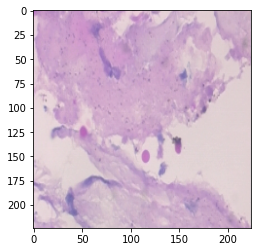

In [5]:
malignant_final=np.array(list(itertools.chain.from_iterable(malignant)))

malignant_final.shape

benign_label = np.zeros(len(benign_final))
malign_label = np.ones(len(malignant_final))

X=np.concatenate((benign_final, malignant_final), axis = 0)

Y=np.concatenate((benign_label, malign_label), axis = 0)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

pd.DataFrame(Y_test)[0].value_counts()

pd.DataFrame(Y_train)[0].value_counts()



s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

Y_train = to_categorical(Y_train, num_classes= 2)
Y_test = to_categorical(Y_test, num_classes= 2)

plt.imshow(X_train[0])

AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 64
EPOCHS = 200



val_samples = 2000
x_val, y_val = X_train[:val_samples], Y_train[:val_samples]
new_x_train, new_y_train = X_train[val_samples:], Y_train[val_samples:]



# Traditional Data Augmentation

In [6]:
AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 64
EPOCHS = 10

val_samples = 2000
x_val, y_val = X_train[:val_samples], Y_train[:val_samples]
new_x_train, new_y_train = X_train[val_samples:], Y_train[val_samples:]





BATCH_SIZE = 16

train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        shear_range=0.7,
        brightness_range=[0.2,0.6]
    )

# Some sample and split of X_train->x_train, x_val

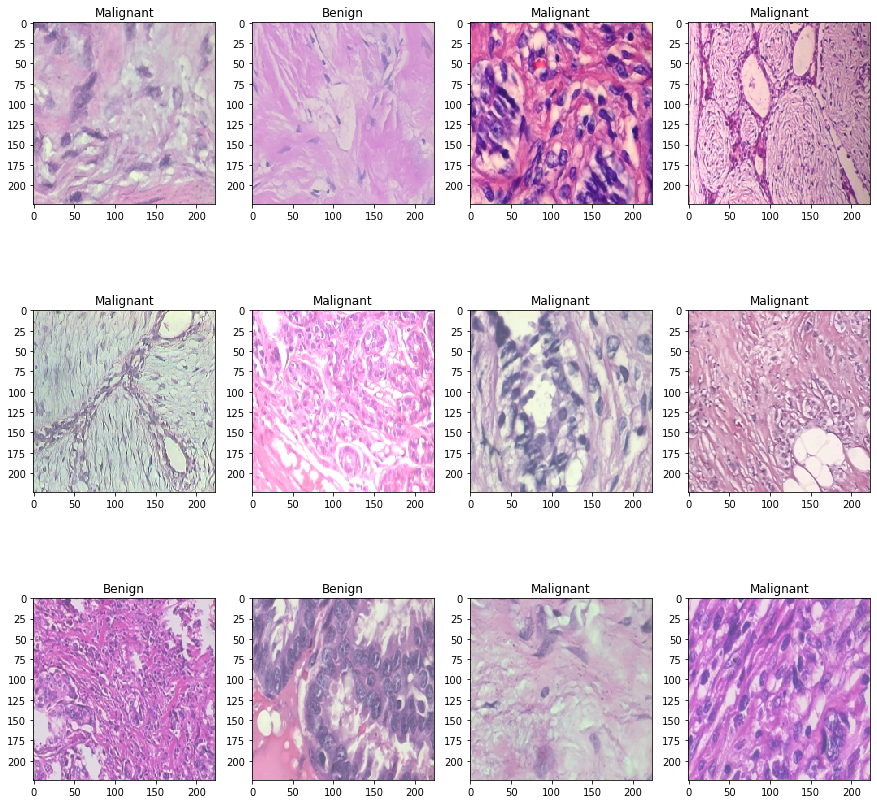

In [7]:
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=11
)

w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(Y_train[i]) == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(x_train[i], interpolation='nearest')
plt.show()

# Convolutional Neural Network

In [8]:


def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    return model

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

model = build_model(resnet ,lr = 1e-4)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1920)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1920)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1920)              7680      
_________________________________________________________________
dense (Dense)                (None, 2)                 3842      
Total params: 18,333,506
Trainable params: 18,100,610
Non-trainable params: 232,896
_________________________________________________________________


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=10,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
264/264 [==============================] - 2740s 10s/step - loss: 0.4712 - accuracy: 0.8110 - val_loss: 0.3501 - val_accuracy: 0.8925
Epoch 2/10
264/264 [==============================] - 38299s 145s/step - loss: 0.3580 - accuracy: 0.8677 - val_loss: 0.3233 - val_accuracy: 0.8311
Epoch 3/10
264/264 [==============================] - 2103s 8s/step - loss: 0.3139 - accuracy: 0.8787 - val_loss: 0.2317 - val_accuracy: 0.9057
Epoch 4/10
264/264 [==============================] - 2253s 9s/step - loss: 0.2916 - accuracy: 0.8884 - val_loss: 0.3343 - val_accuracy: 0.8792
Epoch 5/10
264/264 [==============================] - 2224s 8s/step - loss: 0.2622 - accuracy: 0.8967 - val_loss: 0.2254 - val_accuracy: 0.9066
Epoch 6/10
264/264 [==============================] - 2293s 9s/step - loss: 0.2571 - accuracy: 0.8974 - val_loss: 0.2352 - val_accuracy: 0.9160
Epoch 7/10
264/264 [==============================] - 2754s 10s/step - loss: 0.2547 - accuracy: 0.8988 - val_loss: 0.2560 - val_accu

<AxesSubplot:>

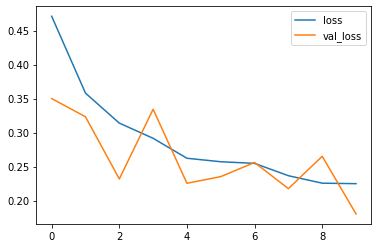

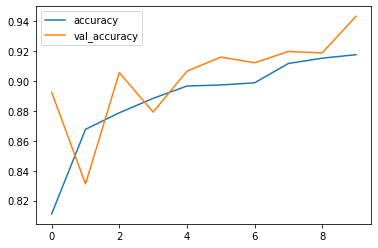

In [10]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

In [19]:
y_pred=model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report( np.argmax(Y_test, axis=1), np.argmax(y_pred, axis=1)))



              precision    recall  f1-score   support

           0       0.93      0.88      0.90       847
           1       0.94      0.97      0.95      1763

    accuracy                           0.94      2610
   macro avg       0.94      0.92      0.93      2610
weighted avg       0.94      0.94      0.94      2610



Confusion matrix, without normalization
[[ 743  104]
 [  58 1705]]


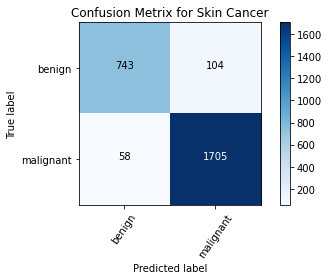

In [23]:

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(y_pred, axis=1))

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

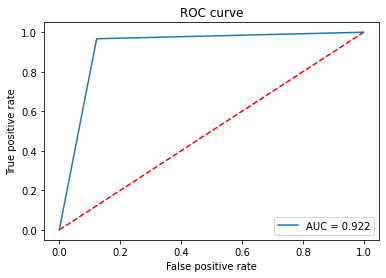

In [24]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(np.argmax(Y_test, axis=1), np.argmax(y_pred, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(Y_test, axis=1), np.argmax(y_pred, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

In [25]:
from tensorflow import keras

In [26]:
model.save('/Users/ssing623/Documents/B Cancer/model_final_all')

INFO:tensorflow:Assets written to: /Users/ssing623/Documents/B Cancer/model_final_all/assets


In [27]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(np.argmax(Y_test, axis=1), np.argmax(y_pred, axis=1))*100

93.79310344827586

In [ ]:
#model = keras.models.load_model('path/to/location')
